In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from nltk.tokenize import word_tokenize

In [2]:
word_model_all = Word2Vec.load('urdu_all_word2vec.bin')
print(word_model_all)

Word2Vec<vocab=433720, vector_size=100, alpha=0.025>


In [96]:
len(word_model_all.wv.vectors)

433720

In [97]:
word_model_all.wv.key_to_index

{'کے': 0,
 'میں': 1,
 'کی': 2,
 'سے': 3,
 'کا': 4,
 'نے': 5,
 'اور': 6,
 'ہے': 7,
 'کو': 8,
 'کہ': 9,
 'پر': 10,
 'اس': 11,
 'بھی': 12,
 'ہیں': 13,
 'ایک': 14,
 'کیا': 15,
 'کر': 16,
 'ان': 17,
 'نہیں': 18,
 'پاکستان': 19,
 'یہ': 20,
 'تھا': 21,
 'لیے': 22,
 'وہ': 23,
 'کرنے': 24,
 'گیا': 25,
 'ٹیم': 26,
 'فلم': 27,
 'بعد': 28,
 'تو': 29,
 'جس': 30,
 'ساتھ': 31,
 'سی': 32,
 'کہا': 33,
 'ہی': 34,
 'ہوئے': 35,
 'ہو': 36,
 'رہے': 37,
 'اپنے': 38,
 'خان': 39,
 'تک': 40,
 'جو': 41,
 'بی': 42,
 'والے': 43,
 'میچ': 44,
 'دیا': 45,
 'ہونے': 46,
 'رنز': 47,
 'مطابق': 48,
 'کرکٹ': 49,
 'کہنا': 50,
 'کرتے': 51,
 'اپنی': 52,
 'جانب': 53,
 'پی': 54,
 'سال': 55,
 'گئی': 56,
 'جبکہ': 57,
 'لیکن': 58,
 'دی': 59,
 'تھی': 60,
 'گے': 61,
 'نہ': 62,
 'پہلے': 63,
 'تھے': 64,
 'روپے': 65,
 'اب': 66,
 'جائے': 67,
 'گا': 68,
 'گئے': 69,
 'والی': 70,
 'جب': 71,
 'گی': 72,
 'جاری': 73,
 'حاصل': 74,
 'کوئی': 75,
 'خلاف': 76,
 'دو': 77,
 'زیادہ': 78,
 'ٹی': 79,
 'سب': 80,
 'ٹیسٹ': 81,
 'بات': 82,
 'ہوا': 83,
 'وق

In [98]:
word_model_article = Word2Vec.load('urdu_article_word2vec.bin')
print(word_model_article)

Word2Vec<vocab=65206, vector_size=100, alpha=0.025>


In [99]:
word_model_headline = Word2Vec.load('urdu_headline_word2vec.bin')
print(word_model_headline)

Word2Vec<vocab=10225, vector_size=100, alpha=0.025>


In [59]:
df1 = pd.read_csv('MK-PUCIT 10 folds/fold1/urduDataTrainfold1.csv')
df1

,لاہور,Location
0,(,Other
1,این,Other
2,این,Other
3,آئی,Other
4,),Other
...,...,...
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other
673023,گی,Other


In [60]:
df1.columns = ['word', 'NER']

In [61]:
df1 = df1.dropna()

In [62]:
df1 = df1[~df1['word'].str.contains('\(')]
df1 = df1[~df1['word'].str.contains('\)')]
# df1 = df1[~df1['word'].str.contains('ControlPanel.{21EC2020-3AEA-1069-A2DD-08002B30309D}')]

In [63]:
df1

,word,NER
1,این,Other
2,این,Other
3,آئی,Other
5,اداکار,Other
6,وسیم,Person
...,...,...
673019,کو,Other
673020,حتمی,Other
673021,شکل,Other
673022,دے,Other


In [64]:
df1[5:15]

,word,NER
7,عباس,Person
8,بھی,Other
9,عارضی,Other
10,طور,Other
11,پر,Other
12,کراچی,Location
13,شفٹ,Other
14,ہو,Other
15,گئے,Other
17,بتایا,Other


In [65]:
max_word_length = df1['word'].apply(lambda x: len(x)).max()

print("Maximum length of word:", max_word_length)

Maximum length of word: 27


In [66]:
max_length_words = df1[df1['word'].apply(lambda x: len(x)) == max_word_length]['word']

max_length_words_list = max_length_words.tolist()

print("Word(s) with maximum length:", max_length_words)

Word(s) with maximum length: 336346    ‫CraziestMarriageProposal_s
536772    پیداوارکاحصہ5ہزار500میگاواٹ
Name: word, dtype: object


In [14]:
pip install urduhack

Note: you may need to restart the kernel to use updated packages.


In [67]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from urduhack import normalize
from urduhack.preprocessing import replace_currency_symbols, replace_numbers, remove_accents, normalize_whitespace 
from urduhack.preprocessing import replace_phone_numbers, replace_emails, replace_urls, remove_punctuation
from urduhack.tokenization import word_tokenizer

In [68]:
def preprocess_urdu_text(text):
    if isinstance(text, str):
        text = replace_currency_symbols(text)
        text = replace_numbers(text)
        text = remove_accents(text)
        text = normalize_whitespace(text)
        text = replace_phone_numbers(text)
        text = replace_emails(text)
        text = replace_urls(text)
        text = remove_punctuation(text)
        text = normalize(text)
        return text
    else:
        return ""

In [69]:
df1['Preprocessed_word'] = df1['word'].apply(preprocess_urdu_text)

In [70]:
df1 = df1[df1['Preprocessed_word'].str.strip() != '']

In [71]:
df1

,word,NER,Preprocessed_word
1,این,Other,این
2,این,Other,این
3,آئی,Other,آئی
5,اداکار,Other,اداکار
6,وسیم,Person,وسیم
...,...,...,...
673019,کو,Other,کو
673020,حتمی,Other,حتمی
673021,شکل,Other,شکل
673022,دے,Other,دے


In [72]:
df1['NER'].value_counts()

NER
Other           538810
Location         32344
Person           26200
Organization     15010
Name: count, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X , y = df1['Preprocessed_word'], df1['NER']

In [74]:
X

1            این
2            این
3            آئی
5         اداکار
6           وسیم
           ...  
673019        کو
673020      حتمی
673021       شکل
673022        دے
673023        گی
Name: Preprocessed_word, Length: 612364, dtype: object

In [5]:
def vectorize_data(data, vocab: dict) -> list:
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    return vectorized

In [137]:
from keras.preprocessing.sequence import pad_sequences
input_length = 50
X_pad = pad_sequences(
    sequences=vectorize_data(X, vocab=word_model_all.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Transform sentences to sequences... (done)


In [138]:
X_pad

array([[ 7863, 37236,  2005, ...,     0,     0,     0],
       [ 7863, 37236,  2005, ...,     0,     0,     0],
       [  974, 37236,     0, ...,     0,     0,     0],
       ...,
       [59338, 25258, 72501, ...,     0,     0,     0],
       [64648, 23088,     0, ...,     0,     0,     0],
       [77399, 37236,     0, ...,     0,     0,     0]], dtype=int32)

In [139]:
y = pd.get_dummies(df1['NER'])
y

,Location,Organization,Other,Person
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
5,False,False,True,False
6,False,False,False,True
...,...,...,...,...
673019,False,False,True,False
673020,False,False,True,False
673021,False,False,True,False
673022,False,False,True,False


In [140]:
label2idx = {label: idx for idx, label in enumerate(y.columns)}
label2idx

{'Location': 0, 'Organization': 1, 'Other': 2, 'Person': 3}

In [8]:
idx2label = {0: 'Location', 1:  'Organization', 2:'Other', 3:'Person'}

In [142]:
y = y.astype(int)

In [143]:
y = y.values.tolist()

In [144]:
y = np.array(y)

In [145]:
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42)

In [147]:
X_test_model = X_test

In [86]:
print('training size :', X_train.shape[0])

training size : 489891


In [87]:
print('testing size :',X_test.shape[0])

testing size : 122473


In [88]:
def build_model(embedding_matrix: np.ndarray, input_length: int):
    model = Sequential()
    model.add(Embedding(
        input_dim = embedding_matrix.shape[0],
        output_dim = embedding_matrix.shape[1], 
        input_length = input_length,
        weights = [embedding_matrix],
        trainable=False))
    model.add(Bidirectional(LSTM(128, recurrent_dropout=0.1)))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation='softmax'))
    model.summary()
    return model

model = build_model(
    embedding_matrix=word_model_all.wv.vectors,
    input_length=input_length)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           43372000  
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 43623204 (166.41 MB)
Trainable params: 251204 (981.27 KB)
Non-trainable params: 43372000 (165.45 MB)
_____

In [89]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=3)

Epoch 1/3
3828/3828 [==============================] - 891s 232ms/step - loss: 0.3632 - accuracy: 0.8953 - val_loss: 0.2946 - val_accuracy: 0.9083
Epoch 2/3
3828/3828 [==============================] - 884s 231ms/step - loss: 0.2749 - accuracy: 0.9155 - val_loss: 0.2525 - val_accuracy: 0.9204
Epoch 3/3
3828/3828 [==============================] - 913s 238ms/step - loss: 0.2454 - accuracy: 0.9223 - val_loss: 0.2352 - val_accuracy: 0.9264


In [90]:
model.save('urdu_all_ner_model_train.h5')

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
model.evaluate(X_test, y_test)

3828/3828 [==============================] - 92s 24ms/step - loss: 0.2352 - accuracy: 0.9264


[0.23521563410758972, 0.9264246225357056]

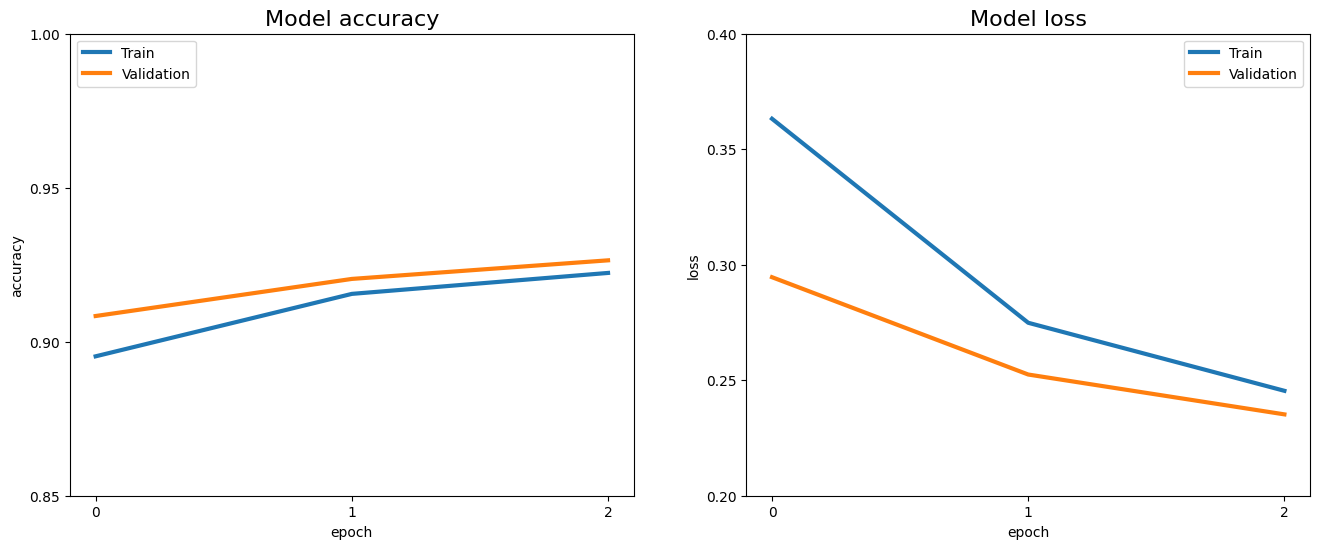

In [92]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')
axis1.set_yticks([0.85, 0.9, 0.95, 1.0])
axis1.set_xticks([0, 1.0, 2.0])

axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
axis2.set_yticks([0.20, 0.25, 0.30, 0.35, 0.40])
axis2.set_xticks([0, 1.0, 2.0])
plt.show()

In [4]:
def out(text, model, word):
    token = word_tokenize(text)
    pad = pad_sequences(
        sequences=vectorize_data(token, vocab=word.wv.key_to_index),
        maxlen=50,
        padding='post')
    output = model.predict(pad)
    output = np.argmax(output, axis=1)
    prediction = [int(val) for val in output]
    pred_tag_list = [idx2label[tag_id] for tag_id in prediction]
    return pred_tag_list

In [134]:
out('میں لاہور گیا۔', model3, word_model_article)

1/1 [==============================] - 0s 47ms/step


['Other', 'Location', 'Other']

In [148]:
input_length = 50
X_pad = pad_sequences(
    sequences=vectorize_data(X, vocab=word_model_headline.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Transform sentences to sequences... (done)


In [149]:
y = pd.get_dummies(df1['NER'])
y

,Location,Organization,Other,Person
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
5,False,False,True,False
6,False,False,False,True
...,...,...,...,...
673019,False,False,True,False
673020,False,False,True,False
673021,False,False,True,False
673022,False,False,True,False


In [150]:
y = y.astype(int)
y = y.values.tolist()
y = np.array(y)
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42)
print('training size :', X_train.shape[0])
print('testing size :',X_test.shape[0])

training size : 489891
testing size : 122473


In [152]:
X_test_model2 = X_test

In [106]:
model2 = build_model(
    embedding_matrix=word_model_headline.wv.vectors,
    input_length=input_length)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 100)           1022500   
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1273704 (4.86 MB)
Trainable params: 251204 (981.27 KB)
Non-trainable params: 1022500 (3.90 MB)
___________

In [107]:
model2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy'])

history2 = model2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=3)

Epoch 1/3
3828/3828 [==============================] - 896s 234ms/step - loss: 0.4857 - accuracy: 0.8798 - val_loss: 0.4785 - val_accuracy: 0.8792
Epoch 2/3
3828/3828 [==============================] - 878s 229ms/step - loss: 0.4739 - accuracy: 0.8801 - val_loss: 0.4672 - val_accuracy: 0.8795
Epoch 3/3
3828/3828 [==============================] - 907s 237ms/step - loss: 0.4634 - accuracy: 0.8805 - val_loss: 0.4629 - val_accuracy: 0.8798


In [162]:
model2.save('urdu_headline_ner_model_train.h5')

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


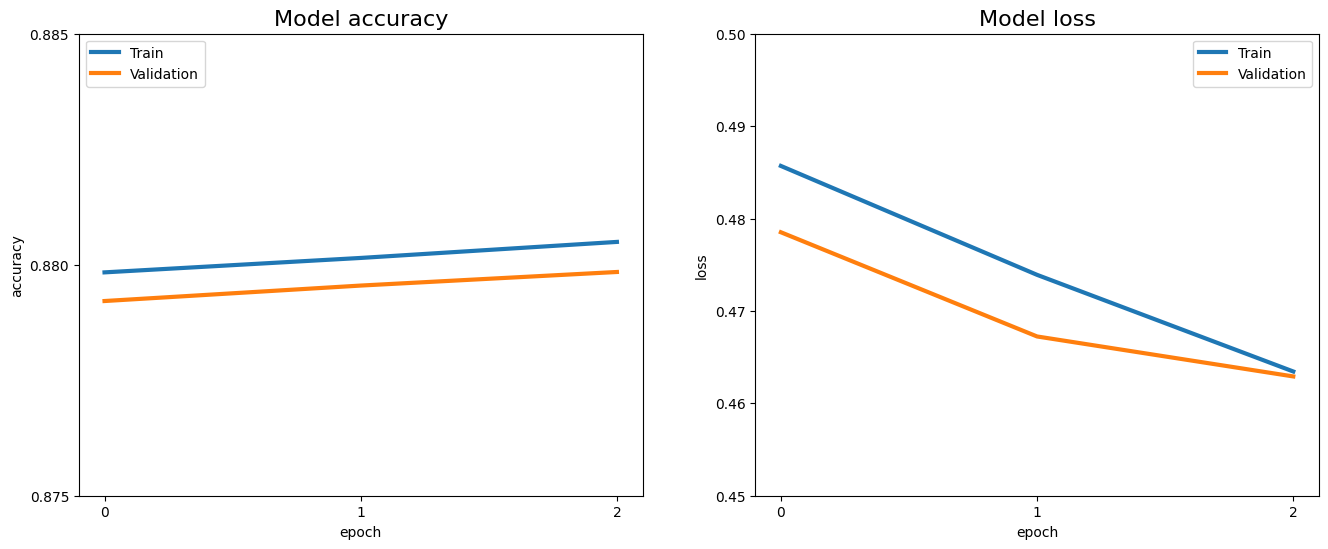

In [125]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axis1.plot(history2.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history2.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')
axis1.set_yticks([0.875, 0.880, 0.885])
axis1.set_xticks([0, 1.0, 2.0])

axis2.plot(history2.history['loss'], label='Train', linewidth=3)
axis2.plot(history2.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
axis2.set_yticks([0.45, 0.46, 0.47, 0.48, 0.49, 0.50])
axis2.set_xticks([0, 1.0, 2.0])
plt.show()

In [3]:
def out(text, model):
    token = word_tokenize(text)
    pad = pad_sequences(
        sequences=vectorize_data(token, vocab=word_model_headline.wv.key_to_index),
        maxlen=50,
        padding='post')
    output = model.predict(pad)
    output = np.argmax(output, axis=1)
    prediction = [int(val) for val in output]
    pred_tag_list = [idx2label[tag_id] for tag_id in prediction]
    return pred_tag_list

In [111]:
out('میں لاہور گیا۔', model2)

1/1 [==============================] - 0s 19ms/step


['Other', 'Other', 'Other']

In [153]:
input_length = 50
X_pad = pad_sequences(
    sequences=vectorize_data(X, vocab=word_model_article.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Transform sentences to sequences... (done)


In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pad,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42)
print('training size :', X_train.shape[0])
print('testing size :',X_test.shape[0])

training size : 489891
testing size : 122473


In [155]:
X_test_model3 = X_test

In [114]:
model3 = build_model(
    embedding_matrix=word_model_article.wv.vectors,
    input_length=input_length)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           6520600   
                                                                 
 bidirectional_4 (Bidirecti  (None, 256)               234496    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 4)                 260       
                                                                 
Total params: 6771804 (25.83 MB)
Trainable params: 251204 (981.27 KB)
Non-trainable params: 6520600 (24.87 MB)
_________

In [115]:
model3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy'])

history3 = model3.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=3)

Epoch 1/3
3828/3828 [==============================] - 918s 239ms/step - loss: 0.3595 - accuracy: 0.8965 - val_loss: 0.2979 - val_accuracy: 0.9088
Epoch 2/3
3828/3828 [==============================] - 995s 260ms/step - loss: 0.2737 - accuracy: 0.9161 - val_loss: 0.2517 - val_accuracy: 0.9221
Epoch 3/3
3828/3828 [==============================] - 938s 245ms/step - loss: 0.2450 - accuracy: 0.9228 - val_loss: 0.2341 - val_accuracy: 0.9252


In [161]:
model3.save('urdu_article_ner_model_train.h5')

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


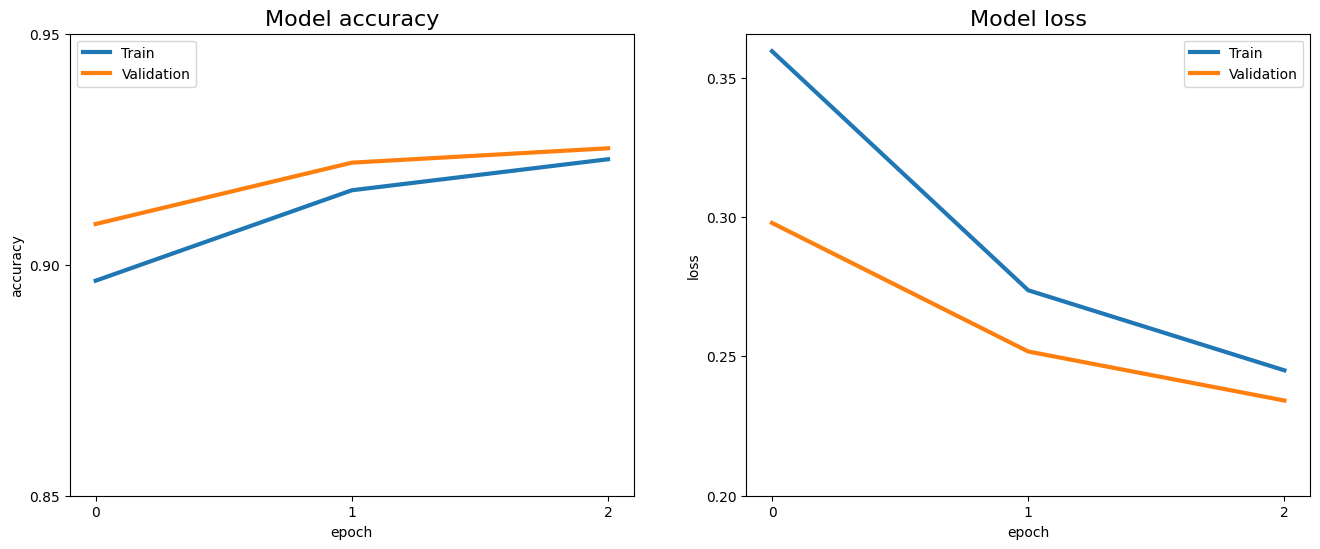

In [118]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

axis1.plot(history3.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history3.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')
axis1.set_yticks([0.85, 0.9, 0.95])
axis1.set_xticks([0, 1.0, 2.0])

axis2.plot(history3.history['loss'], label='Train', linewidth=3)
axis2.plot(history3.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
axis2.set_yticks([0.20, 0.25, 0.30, 0.35])
axis2.set_xticks([0, 1.0, 2.0])
plt.show()

In [156]:
model = tf.keras.models.load_model('urdu_all_ner_model_train.h5')
test1 = model.evaluate(X_test_model, y_test)
test2 = model2.evaluate(X_test_model2, y_test)
test3 = model3.evaluate(X_test_model3, y_test)

3828/3828 [==============================] - 102s 27ms/step - loss: 0.2341 - accuracy: 0.9252


In [6]:
model = tf.keras.models.load_model('urdu_all_ner_model_train.h5')

In [9]:
out('میں لاہور گیا۔', model, word_model_all)

1/1 [==============================] - 0s 18ms/step


['Other', 'Location', 'Other']

In [10]:
out('محمد گھر گیا', model, word_model_all)

1/1 [==============================] - 0s 20ms/step


['Person', 'Other', 'Other']

In [160]:
train_accuracy_model1 = history.history['accuracy']
test_accuracy_model1 = history.history['val_accuracy']

train_accuracy_model2 = history2.history['accuracy']
test_accuracy_model2 = history2.history['val_accuracy']

train_accuracy_model3 = history3.history['accuracy']
test_accuracy_model3 = history3.history['val_accuracy']

data = {'Model': ['AllW2v', 'HeadlinesW2v', 'ArticlesW2v'],
        'Train Accuracy': [train_accuracy_model1[-1], train_accuracy_model2[-1], train_accuracy_model3[-1]],
        'Test Accuracy': [test_accuracy_model1[-1], test_accuracy_model2[-1], test_accuracy_model3[-1]]}

df_accuracy = pd.DataFrame(data)
# df_accuracy.set_index('Model', inplace=True)

df_accuracy


,Model,Train Accuracy,Test Accuracy
0,AllW2v,0.922334,0.926425
1,HeadlinesW2v,0.880494,0.879843
2,ArticlesW2v,0.922832,0.925200


In [174]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [163]:
output = model.predict(X_test_model)
output = np.argmax(output, axis=1)
prediction = [int(val) for val in output]

3828/3828 [==============================] - 80s 20ms/step


In [165]:
output

array([2, 2, 3, ..., 2, 2, 2])

In [166]:
y_test_model = np.argmax(y_test, axis=1)
y_test_model

array([2, 2, 0, ..., 2, 2, 2])

In [179]:
f1_model = f1_score(y_test_model, output, average='weighted')
precision_model = precision_score(y_test_model, output, average='weighted')
recall_model = recall_score(y_test_model, output, average='weighted')

In [169]:
output2 = model2.predict(X_test_model2)
output2 = np.argmax(output2, axis=1)
y_test_model2 = np.argmax(y_test, axis=1)

3828/3828 [==============================] - 89s 23ms/step


In [180]:
f1_model2 = f1_score(y_test_model2, output2, average='weighted')
precision_model2 = precision_score(y_test_model2, output2, average='weighted')
recall_model2 = recall_score(y_test_model2, output2, average='weighted')

/Users/zeeshan/Multilingual-Sentiment-Analysis/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
output3 = model3.predict(X_test_model3)
output3 = np.argmax(output3, axis=1)
y_test_model3 = np.argmax(y_test, axis=1)

3828/3828 [==============================] - 79s 21ms/step


In [181]:
f1_model3 = f1_score(y_test_model3, output3, average='weighted')
precision_model3 = precision_score(y_test_model3, output3, average='weighted')
recall_model3 = recall_score(y_test_model3, output3, average='weighted')

In [182]:
data = {'Model': ['AllW2v', 'HeadlinesW2v', 'ArticlesW2v'],
        'Train Accuracy': [train_accuracy_model1[-1], train_accuracy_model2[-1], train_accuracy_model3[-1]],
        'Test Accuracy': [test_accuracy_model1[-1], test_accuracy_model2[-1], test_accuracy_model3[-1]],
        'F1 Score': [f1_model, f1_model2, f1_model3],
        'Precision': [precision_model, precision_model2, precision_model3],
        'Recall': [recall_model, recall_model2, recall_model3]}

df_accuracy = pd.DataFrame(data)

df_accuracy

,Model,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,AllW2v,0.922334,0.926425,0.921947,0.920196,0.926425
1,HeadlinesW2v,0.880494,0.879843,0.824521,0.852593,0.879843
2,ArticlesW2v,0.922832,0.925200,0.917462,0.917114,0.925200
